# Acetic Acid Titration

**This exercise is inspired by Ziad, 2021-05-13**

One experiment in the HSRW chemistry lab is the titration of Sodium Hydroxyde $\mathrm{NaOH}$ into acidic solutions such as Acetic Acid $\mathrm{CH_3COOH}$ or hydrochloric acid $\mathrm{HCl}$. 

$\mathrm{NaOH}$ is slowly added to the solution and the pH-value is measured. IN the beginning the pH of the mixture is increasing slowly. But at a certain ratio of $\mathrm{NaOH}$ and acid the pH-value suddenly increases steeply. After this very steep edge the pH-value rises only slowly again and almost saturates.

One exercise of this practical experiment is to determine the middle point on the steep rising edge: At which concentration of $\mathrm{NaOH}$ does is happen and with pH-value lies in the middel of the edge?

In [322]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Linear Regression Function

You don't have to understand the math of the regression in order to use this function.

Call `help(my_lin_reg)` to get instructions how to use it.

In [323]:
# linear regression
def my_lin_reg(xs,ys,xr):
    '''
    yr, m, c = my_lin_reg(xs,ys,xr)
    Linear regression approximating the N points (xs,ys)_k
    The resulting linear function is evaluated at coordinates xr yielding yr. The points (xr,yr) make the regression line.
    Furthermore m and c are reported, the two parameters of the linear regression line yr = m * xr + c. 
    '''
    A = np.vstack([xs, np.ones(len(xs))]).T
    m, c = np.linalg.lstsq(A, ys, rcond=None)[0]
    yr = m*xr + c
    return yr, m, c

## Write data to CSV file

Needed only once. You should store data in seperate data files persistently and not in notebooks. You could use a simple text file in CSV format. CSV means: "comma separated values". Instead of comma I am often using semicolon as field separator. In the example below I am using comma ... 


In [324]:
# This is measured titration data for HCL. 
#x = np.array ([0, 2, 4, 6.1, 8, 10, 12, 14.2, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 24.5, 25, 25.5, 26, 28, 30, 32, 34, 36, 38, 40, 45, 50,])
#y = np.array ([1.08, 1.15, 1.23, 1.31, 1.36, 1.42, 1.49, 1.6, 1.63, 1.7, 1.74, 1.81, 1.87, 1.96, 2.05, 2.11, 2.28, 2.49, 2.69, 3.04, 7.04, 10.29, 11.4, 11.71, 11.88, 12, 12.09, 12.14, 12.18, 12.27, 12.33])

#hcl_filename = "hcl_titration.csv"
#X =np.array([x,y]).T
#np.savetxt(hcl_filename,X,fmt='%.3f',delimiter=",")

## Read data from CSV file

Choose the file to read the titration data from. Define an appropriate title for the plots. 

In [353]:
# help(np.loadtxt)

In [365]:
# filename = "acetic_acid_titration.csv"
# title = "Titration of 25ml Acetic Acid (0.1M) with NaOH (0.1M)"
# figname = "Acetic_Acid_Titration"

filename = "hcl_titration.csv"
title = "Titration of 25ml HCl (0.1M) with NaOH (0.1M)"
figname = "HCl_Titration"

In [366]:
X = np.loadtxt(filename,delimiter=",",comments='#' )
x = X[:,0] # NaOH / ml
y = X[:,1] # pH

In [367]:
# List the titration measurements
for a,b in zip(x,y):
    print(f"{a:5.2f}   {b:5.2f}")

 0.00    1.08
 2.00    1.15
 4.00    1.23
 6.10    1.31
 8.00    1.36
10.00    1.42
12.00    1.49
14.20    1.60
15.00    1.63
16.00    1.70
17.00    1.74
18.00    1.81
19.00    1.87
20.00    1.96
21.00    2.05
22.00    2.11
23.00    2.28
24.00    2.49
24.50    2.69
25.00    3.04
25.50    7.04
26.00   10.29
28.00   11.40
30.00   11.71
32.00   11.88
34.00   12.00
36.00   12.09
38.00   12.14
40.00   12.18
45.00   12.27
50.00   12.33


## Plot

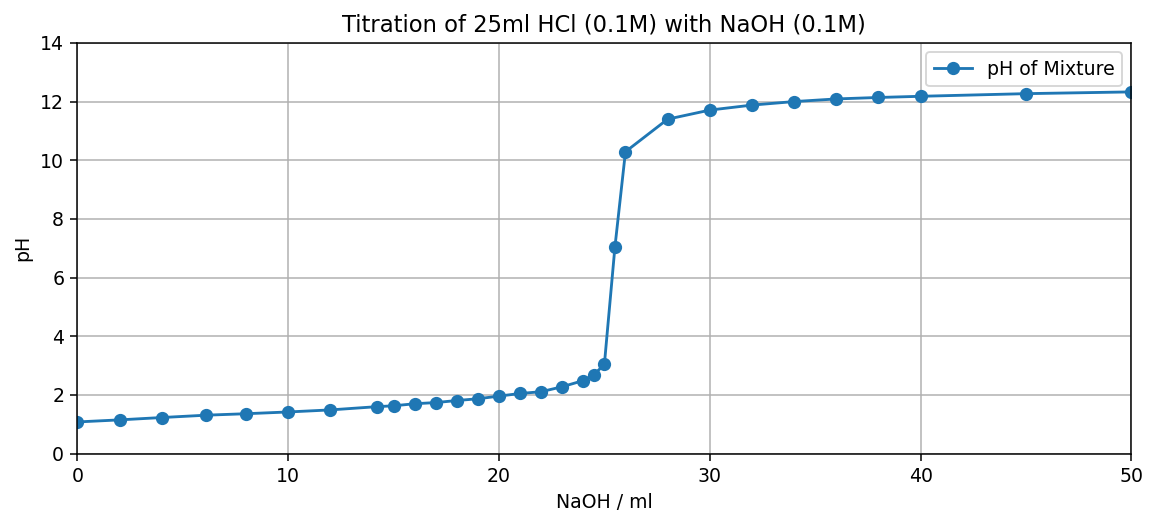

In [370]:
fig1, ax1 = plt.subplots(figsize=(10,4), dpi=136)
ax1.plot(x, y, "o-")
ax1.set_xlabel("NaOH / ml")
ax1.set_ylabel("pH")
ax1.set_xlim([0,50])
ax1.set_ylim([0,14])
ax1.set_title(title)
ax1.grid(True)
ax1.legend(["pH of Mixture"])
fig1.savefig(figname+".png")
plt.show()

In [333]:
help(my_lin_reg)

Help on function my_lin_reg in module __main__:

my_lin_reg(xs, ys, xr)
    yr, m, c = my_lin_reg(xs,ys,xr)
    Linear regression approximating the N points (xs,ys)_k
    The resulting linear function is evaluated at coordinates xr yielding yr. The points (xr,yr) make the regression line.
    Furthermore m and c are reported, the two parameters of the linear regression line yr = m * xr + c.



## Construction of the linear regression lines

In [334]:
# Regression at the left end of the titration graph
xsL = x[:10] # (xs,ys) sample points the linear regression should approximate
ysL = y[:10] # 

xrL = np.linspace(0,30,2) # the x coordinates at which the regression line is drawn (just two points needed: start - end, you can use more, if you want ...)
xrL = np.array([0,30.])
yrL, mL, cL = my_lin_reg(xsL,ysL,xrL) # Perform the linear regression

# Regression at the right end of the titration graph
xsR = x[-5:] # (xs,ys) sample points the linear regression should approximate
ysR = y[-5:] # 

xrR = np.array([20.,50.])
yrR, mR, cR = my_lin_reg(xsR,ysR,xrR) # Perform the linear regression

## Determine the first derivative (difference quotient) of the listed function to detect the steepest edge.

Let us assume that $N+1$ measurements were taken denoted by index $k$. For index $k$ applies: $k \in \{0,\ldots,N\}$. We don't know the titration function in closed form, we just have points $(x,y)$ resulting from the titration experiment. 
<br>
To estimate the slope $m_k$ of the function at a point $x_k$ we take its two neighbors $x_{k-1}$ and $x_{k+1}$ and determine the slope triangle with slope $m_k$. This slope is assigned to index $k$, i.e. it is the estimated slope of the function at $x_k$: 

$$
m_k = \frac{y_{k+1} - y_{k-1}}{x_{k+1} - x_{k-1}}
$$ 

for $k \in \{1, \ldots N-1\}$. 

This triangle approach with left and right neighbors is not applicable to determine the slopes of the function at the left and right boundary, i.e. $k=0$ and $k=N$, respectively. For the end point of the intervals we choose another approach, e.g.

$$
\begin{eqnarray}
m_0 & = & \frac{y_{1} - y_{0}}{x_{1} - x_{0}} \\
m_N & = & \frac{y_{N} - y_{N-1}}{x_{N} - x_{N-1}}
\end{eqnarray}
$$

In [346]:
# All left points of the triangles
xL = x[0:-2]
yL = y[0:-2]

# All right points of the triangle
xR = x[2:]
yR = y[2:]

# Delta x and Delta y for the triangles
Dx = xR - xL
Dy = yR - yL

# The slope of the triangles, which have to be assigned to index k = 1 ... N-1
m = Dy / Dx

# To shift the indices create a vector of length N+1 (as long as the measurement series) initialized with 0 
M = x*0

# center m in M, i.e. leave one vector element free at each side. The slopes a the sides are initialized with M[0] = 0, M[N] = 0 
M[1:-1] = m 

# Fill in the slopes at the boundaries
M[0]  = ( y[1] - y[0] ) / ( x[1] - x[0] )
M[-1] = ( y[-1]- y[-2]) / ( x[-1]- x[-2])

In [359]:
# Find the index where the slope is max, i.e. the middle of the steeply rising edge. The result of np.where is a vector because the condition could match several times. 
idx_max = np.where(M == np.max(M))

# Get the first element of the result set (here we just have one unique max, anyway) and convert it to int to reuse it as an index
i = int(idx_max[0])

# Regression at the steep egde of the titration graph
# take one point left and one point right of the point where the slope is max
xsM = x[i-1:i+2] 
ysM = y[i-1:i+2]

xrM = np.array([20.,30.])
yrM, mM, cM = my_lin_reg(xsM,ysM,xrM) # Perform the linear regression for the three points on the steep edge


## Determine the crossings of the regression lines and find the middle in between them.

In [360]:
# function to determine the crossing of the linear functions g1(x) = m1*x + c1 and g2 = m2*x + c2.
def get_crossing(m1,c1,m2,c2):
    xc = - (c1-c2) / (m1-m2)
    yc = m1*xc + c1
    return xc, yc

In [361]:
xc1, yc1 = get_crossing(mL,cL,mM,cM) # first regression line crossing
xc2, yc2 = get_crossing(mR,cR,mM,cM) # second regression line crossing
xcM, ycM = 1/2*(xc1 + xc2), 1/2*(yc1 + yc2) # the center point

## Plot

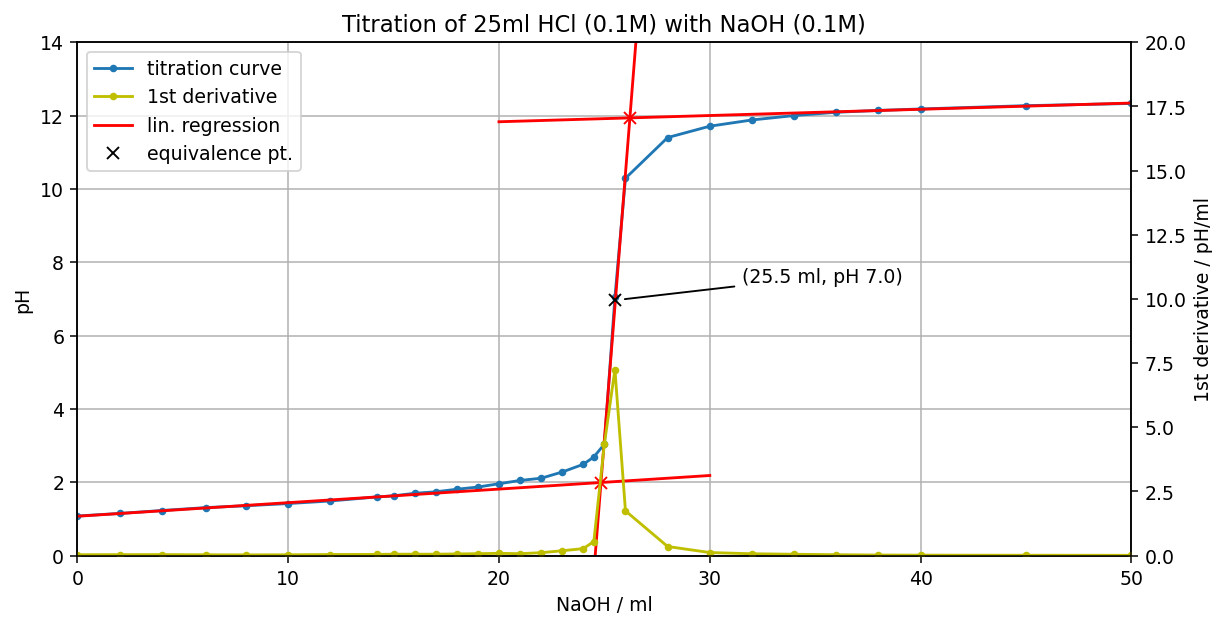

In [363]:
fig2, ax2 = plt.subplots(figsize=(10,5), dpi=136)

tit_handle, = ax2.plot(x, y, ".-", label = "titration curve")

linreg_handle, = ax2.plot(xrL, yrL, "-r", label = "lin. regression") # regression from left
ax2.plot(xrR, yrR, "-r") # regression from right
ax2.plot(xrM, yrM, "-r") # regression at the steep edge

ax2.plot(xc1,yc1,"rx") # 1st crossing
ax2.plot(xc2,yc2,"rx") # 2nd crossing
equiv_handle, = ax2.plot(xcM,ycM,"xk", label = "equivalence pt.") # Mid point between crossings = Equivalence Point(!)

ax2.set_title(title)

ax2.set_xlabel("NaOH / ml")
ax2.set_ylabel("pH")
ax2.set_xlim([0,50])
ax2.set_ylim([0,14])
ax2.grid(True)

ax2.annotate(f"({xcM:4.1f} ml, pH{ycM:4.1f})", xy=(xcM, ycM), xytext=(xcM+6, ycM+0.5), arrowprops=dict(arrowstyle="-", shrinkB = 5))

# 1st derivative on 2nd y-axis
ax2d = ax2.twinx()
der_handle, = ax2d.plot(x, M, "-y.", label = "1st derivative")
ax2d.set_ylabel("1st derivative / pH/ml")
ax2d.set_ylim([0,20])

ax2.legend(handles=[tit_handle, der_handle, linreg_handle, equiv_handle])

fig2.savefig(figname+"_Regression.png")
plt.show()